In [70]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import sklearn 
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import random
%matplotlib inline


In [153]:
Train_data=pd.read_csv('./kagglechalleng/train.csv')
Test_data=pd.read_csv('./kagglechalleng/test.csv')

In [154]:
Test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
X1=np.array(Test_data)
X_test=X1.reshape(X1.shape[0],28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [156]:
Train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
#data=np.array(data)

In [158]:
label=np.array(Train_data['label'])

In [159]:
Train_data.drop('label',axis=1,inplace=True)

In [160]:
Train_data.shape

(42000, 784)

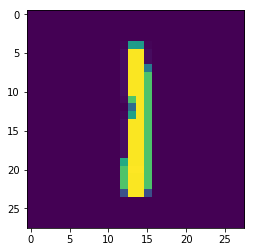

In [165]:
data=np.array(data)
plt.imshow(X[2].reshape(28,28))

In [166]:
len(label)

42000

In [167]:
data.shape

(42000, 784)

In [168]:
data=data.reshape(data.shape[0],28,28,1)

In [169]:
data.shape

(42000, 28, 28, 1)

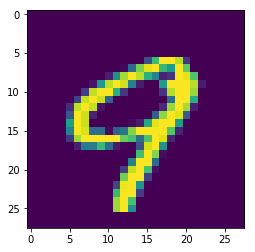

In [171]:
plt.imshow(data[100].reshape(28,28))

In [177]:
from sklearn.model_selection import train_test_split

In [179]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.3, random_state=100)

In [180]:
x_train.shape

(29400, 28, 28, 1)

In [185]:
x_test.shape

(12600, 28, 28, 1)

In [183]:
from sklearn.preprocessing import LabelBinarizer
a=LabelBinarizer()
#y=a.fit_transform()

In [187]:
y_train=a.fit_transform(y_train)
y_test=a.fit_transform(y_test)

[0 1 0 0 0 0 0 0 0 0]


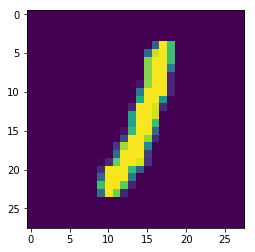

In [189]:
print(y_train[0])
plt.imshow(x_train[0].reshape(28,28))

In [192]:
num_classes=len(y_train[0])

In [193]:
model=Sequential()

In [194]:
model.add(Conv2D(10, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(10, kernel_size=(4,4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [195]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [229]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=20, batch_size=10)

Train on 29400 samples, validate on 12600 samples
Epoch 1/20
29400/29400 [==============================] - 63s 2ms/step - loss: 0.0621 - acc: 0.9844 - val_loss: 0.1466 - val_acc: 0.9771
Epoch 2/20
29400/29400 [==============================] - 58s 2ms/step - loss: 0.0661 - acc: 0.9834 - val_loss: 0.1612 - val_acc: 0.9752
Epoch 3/20
29400/29400 [==============================] - 58s 2ms/step - loss: 0.0680 - acc: 0.9839 - val_loss: 0.1440 - val_acc: 0.9786
Epoch 4/20
29400/29400 [==============================] - 58s 2ms/step - loss: 0.0691 - acc: 0.9845 - val_loss: 0.1244 - val_acc: 0.9766
Epoch 5/20
29400/29400 [==============================] - 57s 2ms/step - loss: 0.0678 - acc: 0.9852 - val_loss: 0.1330 - val_acc: 0.9779
Epoch 6/20
29400/29400 [==============================] - 66s 2ms/step - loss: 0.0647 - acc: 0.9853 - val_loss: 0.1513 - val_acc: 0.9759
Epoch 7/20
29400/29400 [==============================] - 55s 2ms/step - loss: 0.0673 - acc: 0.9848 - val_loss: 0.2170 - val_acc

[[3.23098972e-34 4.71811005e-27 1.23159828e-23 6.00695904e-31
  6.13978722e-35 3.28366010e-27 1.11054373e-32 1.47450745e-24
  1.00000000e+00 1.15099176e-32]]


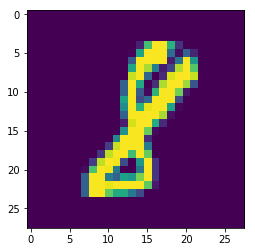

In [232]:
test_image=np.expand_dims(X_test[123], axis = 0)
result = model.predict(test_image)
print(result)
plt.imshow(test_image.reshape(28,28))

In [233]:
predictions = model.predict_classes(X_test, verbose=0)

In [234]:
predictions.shape

(28000,)

In [235]:
predictions[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3], dtype=int64)

In [236]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})

In [237]:
submissions.to_csv("Test_label.csv", index=False, header=True)